In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *

#from structureSelector2 import *
from methods.utils.utilities import *
import plotly.express as px

def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))), 5)
    print('RMSE:', np.sqrt(np.mean(np.square(residuo1))), 'MSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')
    cc = np.corrcoef(y, yest)
    #print("Correlation pearson:", np.mean(cc))

def integrate(p, ts=0.1):
    r = np.zeros(p.shape)
    r[0] = p[0] * ts
    for i in range(1, p.shape[0]):
        r[i] = r[i-1] + p[i] * ts
    return r


# identificação

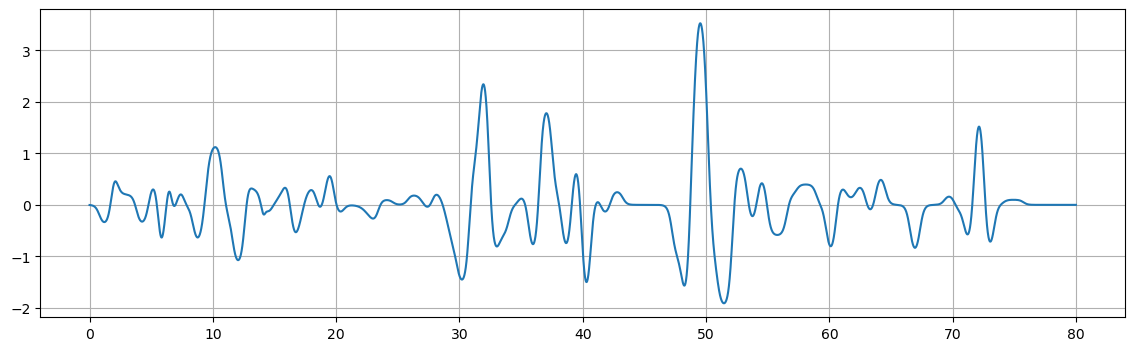

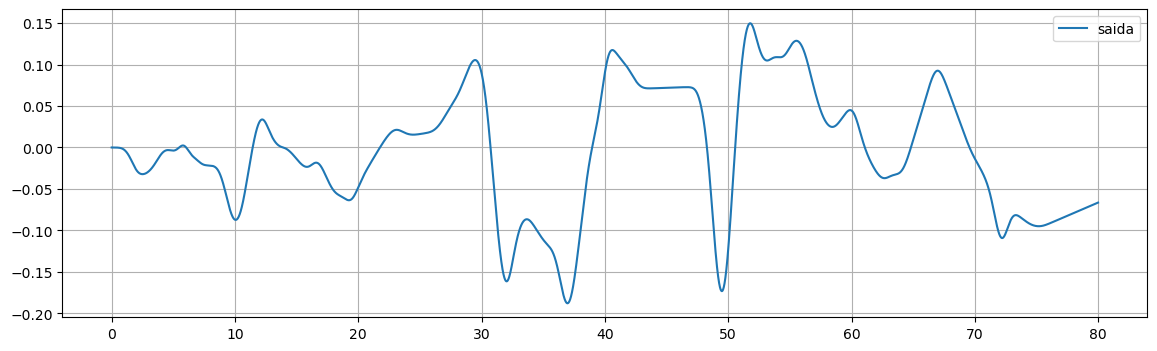

In [6]:
#my_data = np.genfromtxt('data/ballBeam_Est.csv', delimiter=',')[1:,:]
my_data = np.genfromtxt('data/ballBeamRungeKutta_Est.csv', delimiter=',')[1:,:]
u = my_data[:, 0].copy()
y = my_data[:, 1].copy()
t = my_data[:, 3].copy()

np.random.seed(15)
#u += np.random.uniform(-0.0002, 0.0002, u.shape)
#y = y + np.random.uniform(-0.0002, 0.0002, y.shape)

dt = my_data[1, 3]
size = 100
plt.figure(figsize=(14, 4))
plt.plot(t, u*(180/np.pi), label="entrada")
plt.grid()
plt.show()
plt.figure(figsize=(14, 4))
plt.plot(t, y, label="saida")
plt.legend()
plt.grid()
plt.show()

[Y1.1 sin(U1.1) U1.2] [1, 6, 4]
[Y1.1 sin(U1.1) U1.2]
-0.0328585419689906*U1.2 + 1.00000111875307*Y1.1 + 0.0982069008194277*sin(U1.1)
Simulação livre
--------s:  [Y1.1, Y1.2, U1.1, U1.2, U1.3]

Simulação livre
RMSE: 0.00042956873591042317 MSE: 1.8452929887167887e-07 
AET: 2.6567966635407574 
MAPE: 0.13974%

Um passo a frente
RMSE: 6.790769493717972e-07 MSE: 4.611455031681063e-13 
AET: 0.0034943574549579567 
MAPE: 0.00016%


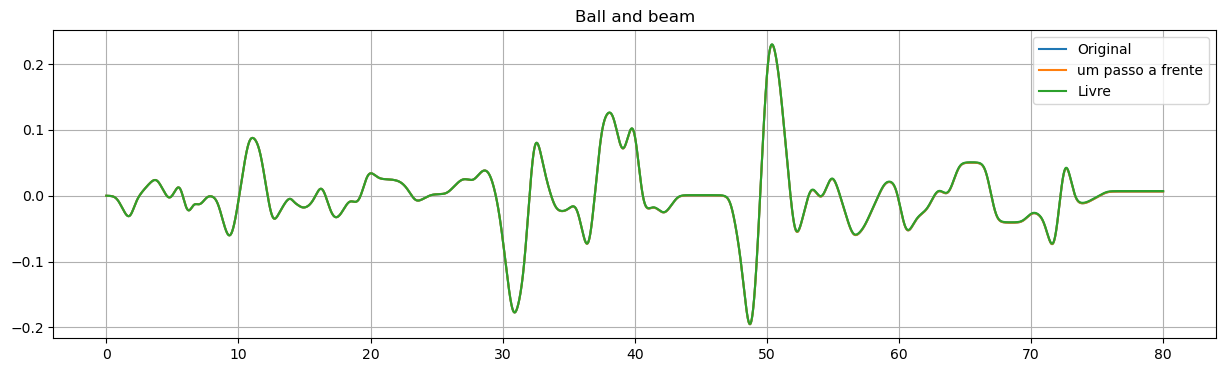

'\ngama = 0.00000000001\nSimulação livre\nRMSE: 0.0011179684558205918 MSE: 1.2498534682098783e-06 \nAET: 6.787920174326276 \nMAPE: 0.26808%\n'

In [7]:
ui = np.reshape(u, (1, -1)).copy()
yi = np.reshape(my_data[:, 2], (1, -1)).copy()

output = 0  # 0 ou 1
num = [10]
params = []
params.append({'nb':[2],'na':[3], 'level':4, 'nonlinear':[1,0,0,0,0], 'root':False, 'delay':1, 'diff':False})

sselector = structureSelector()
ss = sselector.symbolic_regressors(**params[output], intg=False)
#print(ss)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

#print(len(ss), vCandidatos.shape)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 0.000000000001)

model = ss[selected]
print(model, selected)

theta = LSM(yi[output, pad:], psi)
#theta1 = recursiveMQ(yi[output, pad:], psi, pad)

model = ss[selected]
pprint(model)
print(model @ theta)


slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)

print("\nSimulação livre")
metrics(yi, slivre)
print("\nUm passo a frente")
metrics(yi, yhat)

plt.figure(figsize=(15,4))
plt.title("Ball and beam")
plt.plot(t, yi.T, label='Original')
plt.plot(t, yhat, label='um passo a frente')
plt.plot(t, slivre, label='Livre')
plt.legend()
plt.grid()
plt.show()

'''
gama = 0.00000000001
Simulação livre
RMSE: 0.0011179684558205918 MSE: 1.2498534682098783e-06 
AET: 6.787920174326276 
MAPE: 0.26808%
'''

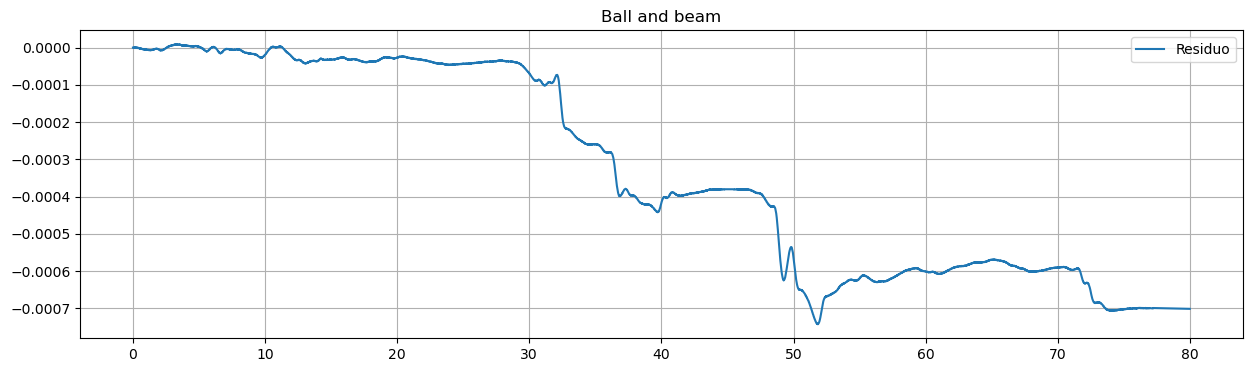

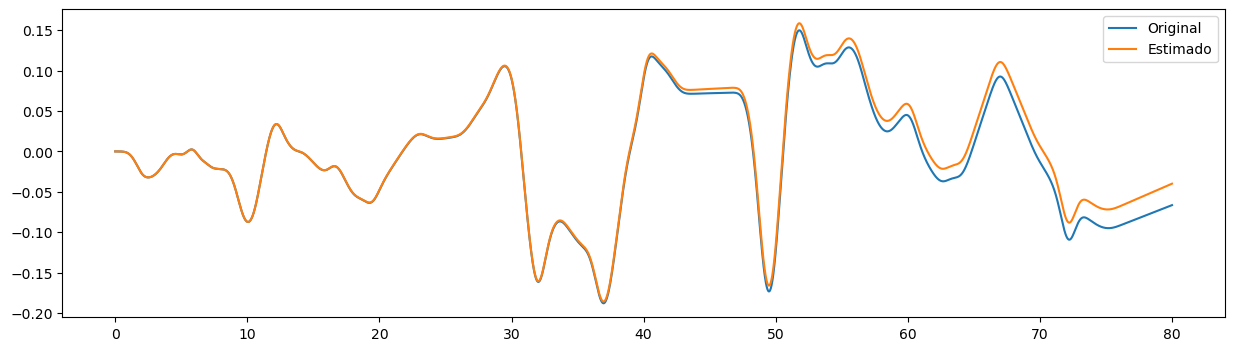

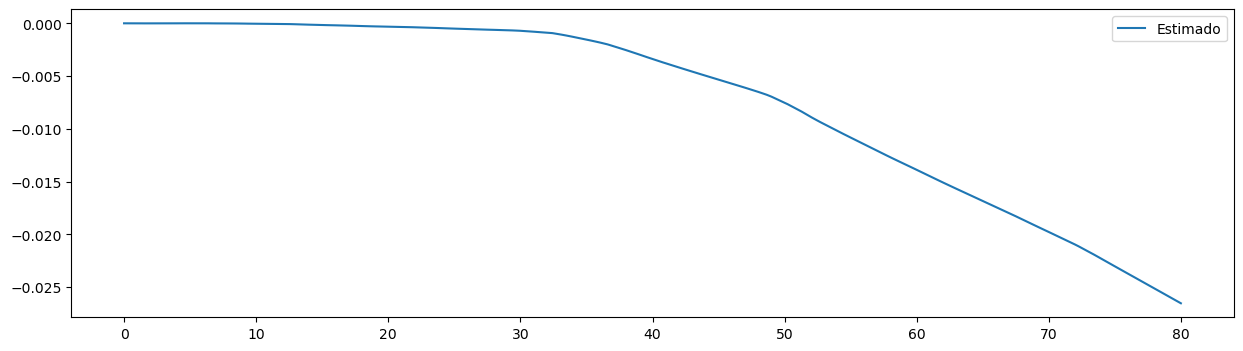

In [8]:
w = integrate(slivre, ts=dt)
plt.figure(figsize=(15,4))
plt.title("Ball and beam")
plt.plot(t, (yi - slivre.T).T, label='Residuo')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(15,4))
plt.plot(t, y, label="Original")
plt.plot(t, w, label="Estimado")
plt.legend()
plt.show()
plt.figure(figsize=(15,4))
plt.plot(t, y-w, label="Estimado")
plt.legend()
plt.show()

# Validação


0.01


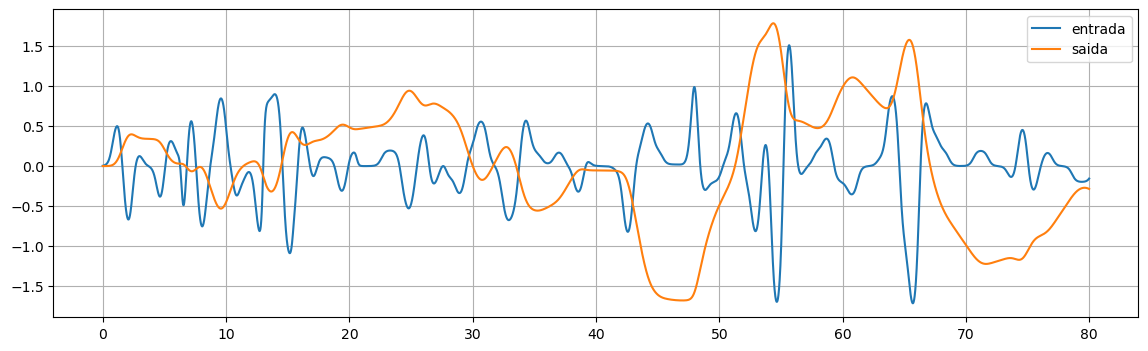

In [9]:

val_data = np.genfromtxt('data/BBRungeKutta_Val.csv', delimiter=',')[1:,:]
uVal = np.reshape(val_data[:, 0], (1, -1))
yValidation = np.reshape(val_data[:, 1], (1, -1))
tVal = val_data[:, -1]

dt = val_data[1, -1]
yVal = np.reshape(val_data[:, 2], (1, -1))
print(dt)
plt.figure(figsize=(14, 4))
plt.plot(tVal, uVal.T*(180/np.pi), label="entrada")
plt.plot(tVal, yValidation.T*10, label="saida")

plt.legend()
plt.grid()
plt.show()

Simulação livre
--------s:  [Y1.1, Y1.2, U1.1, U1.2, U1.3]
Modelo selecionado:
-0.0328585419689906⋅U1.2 + 1.00000111875307⋅Y1.1 + 0.0982069008194277⋅sin(U1.1
)


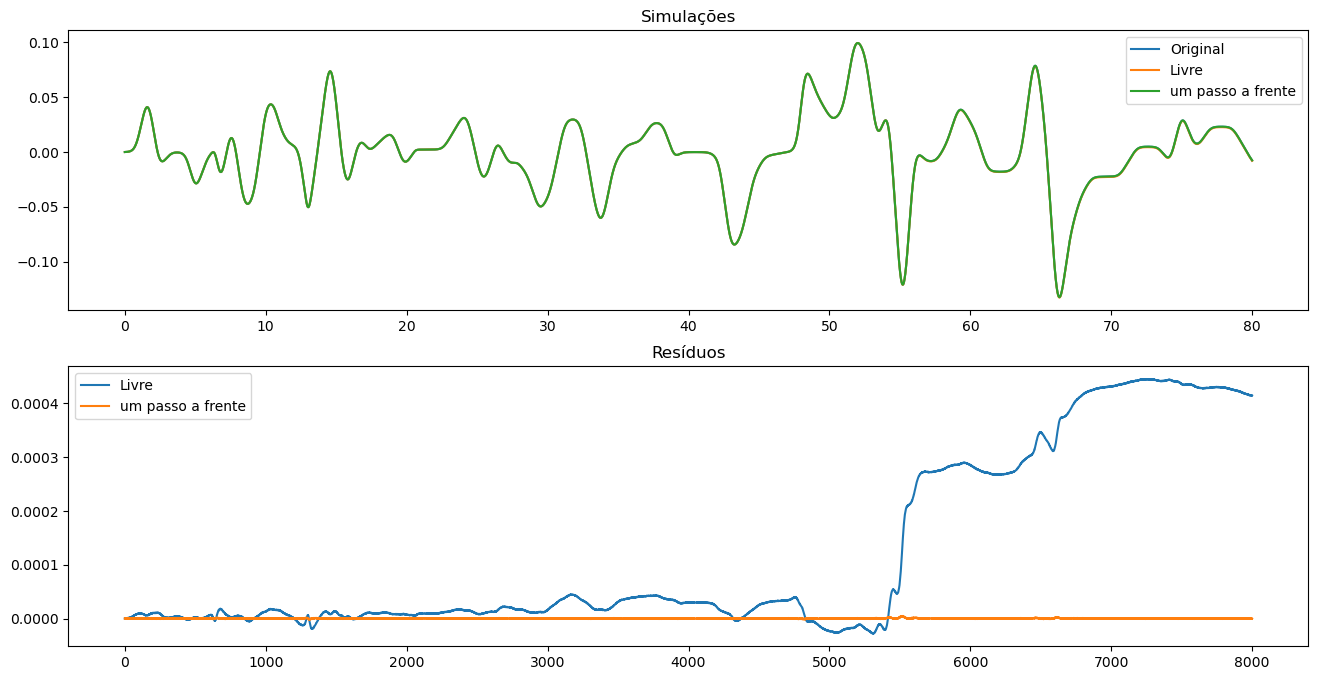

In [10]:
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)

print("Modelo selecionado:")
pprint( model @ theta)

f, ax = plt.subplots(2,1, figsize=[16,8])

ax[0].plot(tVal, yVal[output].T, label='Original')
ax[0].plot(tVal, valLivre, label='Livre')
ax[0].plot(tVal, yhat, label='um passo a frente')
ax[0].set_title("Simulações")
ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot(yVal[output].T - yhat, label='um passo a frente')
ax[1].set_title("Resíduos")
ax[1].legend()
plt.show()

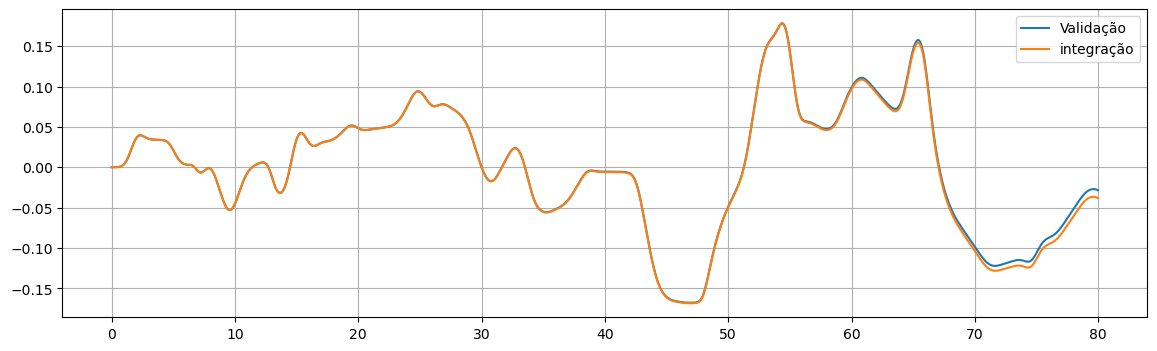

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(tVal, yValidation.T, label="Validação")
plt.plot(tVal, integrate(valLivre, ts=dt), label="integração")
plt.legend()
plt.grid()
plt.show()

# Narx

7 (7, 7997)
[Y1.1 U1.1] [1, 4]
[Y1.1 U1.1]
0.065334844066874*U1.1 + 0.999895649222253*Y1.1
Simulação livre
--------s:  [Y1.1, Y1.2, Y1.3, U1.0, U1.1, U1.2, U1.3]

Simulação livre
RMSE: 0.0008098763758372279 MSE: 6.55899744139243e-07 
AET: 4.931821024088576 
MAPE: 0.37317%

Um passo a frente
RMSE: 5.853212420716212e-06 MSE: 3.426009564202654e-11 
AET: 0.03174390753591033 
MAPE: 0.00088%


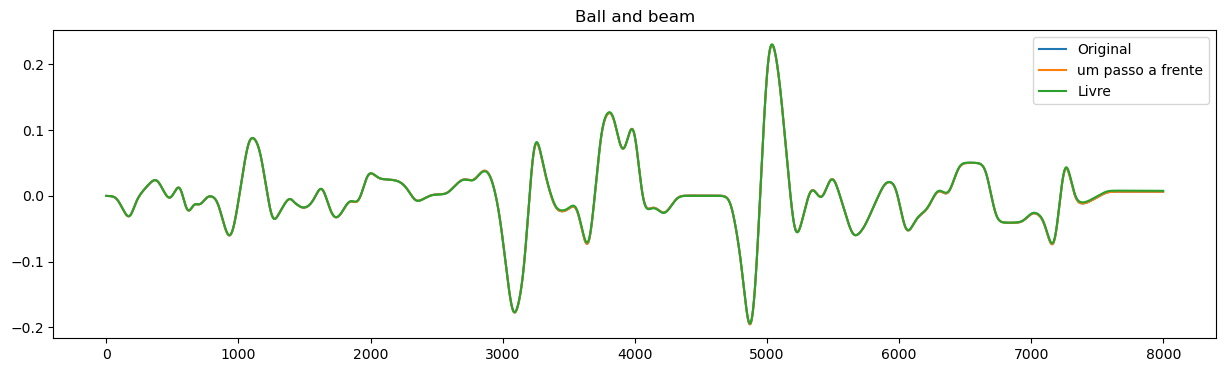

In [12]:
ui = np.reshape(u, (1, -1)).copy()
yi = np.reshape(my_data[:, 2], (1, -1)).copy()

output = 0  # 0 ou 1
num = [4]
params = []
params.append({'nb':[3],'na':[3], 'level':1, 'nonlinear':[0,0,0,0,0], 'root':False, 'delay':0, 'diff':False})

sselector = structureSelector()
ss = sselector.symbolic_regressors(**params[output], intg=False)
#print(ss)

vCandidatos = sselector.matrix_candidate(ui, yi, **params[output], dt=dt, intg=False)

print(len(ss), vCandidatos.shape)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, yi[output, pad:], num[output], 0.000000001)

model = ss[selected]
print(model, selected)

theta = LSM(yi[output, pad:], psi)
#theta1 = recursiveMQ(yi[output, pad:], psi, pad)

model = ss[selected]
pprint(model)
print(model @ theta)


slivre = sselector.predict(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=dt, intg=False)
yhat = sselector.oneStepForward(ui, yi, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['diff'], dt=dt, intg=False)

print("\nSimulação livre")
metrics(yi, slivre)
print("\nUm passo a frente")
metrics(yi, yhat)

plt.figure(figsize=(15,4))
plt.title("Ball and beam")
plt.plot(yi.T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

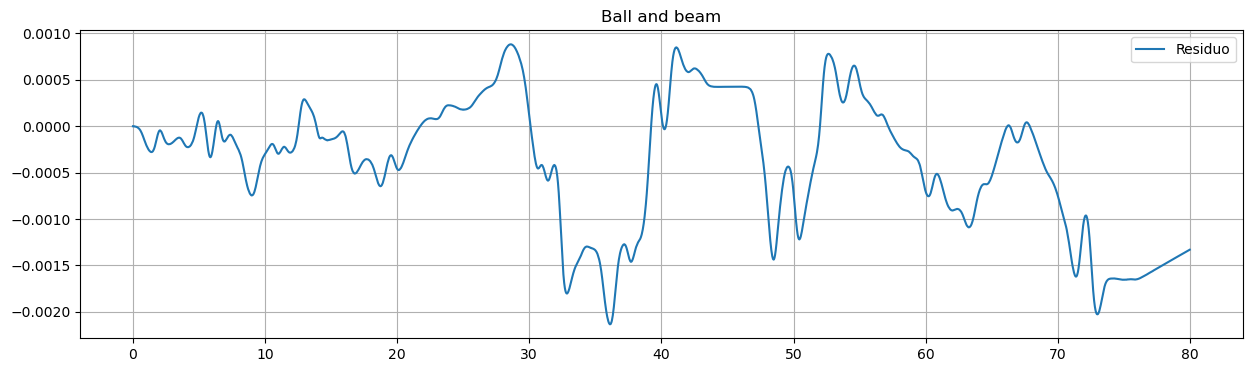

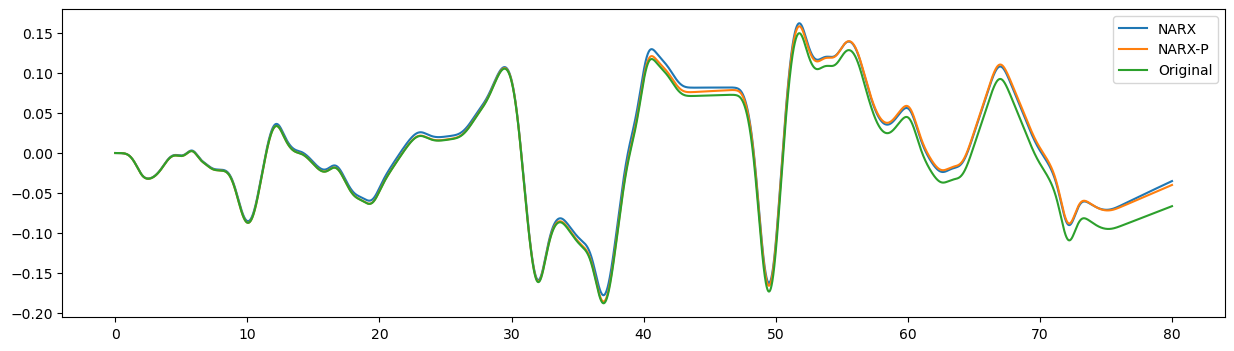

In [38]:

plt.figure(figsize=(15,4))
plt.title("Ball and beam")
plt.plot(t, (yi - slivre.T).T, label='Residuo')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(15,4))
plt.plot(t, integrate(slivre, ts=dt), label="NARX")
plt.plot(t, w, label="NARX-P")
plt.plot(t, y, label="Original")
plt.legend()
plt.show()

Simulação livre
--------s:  [Y1.1, Y1.2, Y1.3, U1.0, U1.1, U1.2, U1.3]
Modelo selecionado:
0.065334844066874⋅U1.1 + 0.999895649222253⋅Y1.1


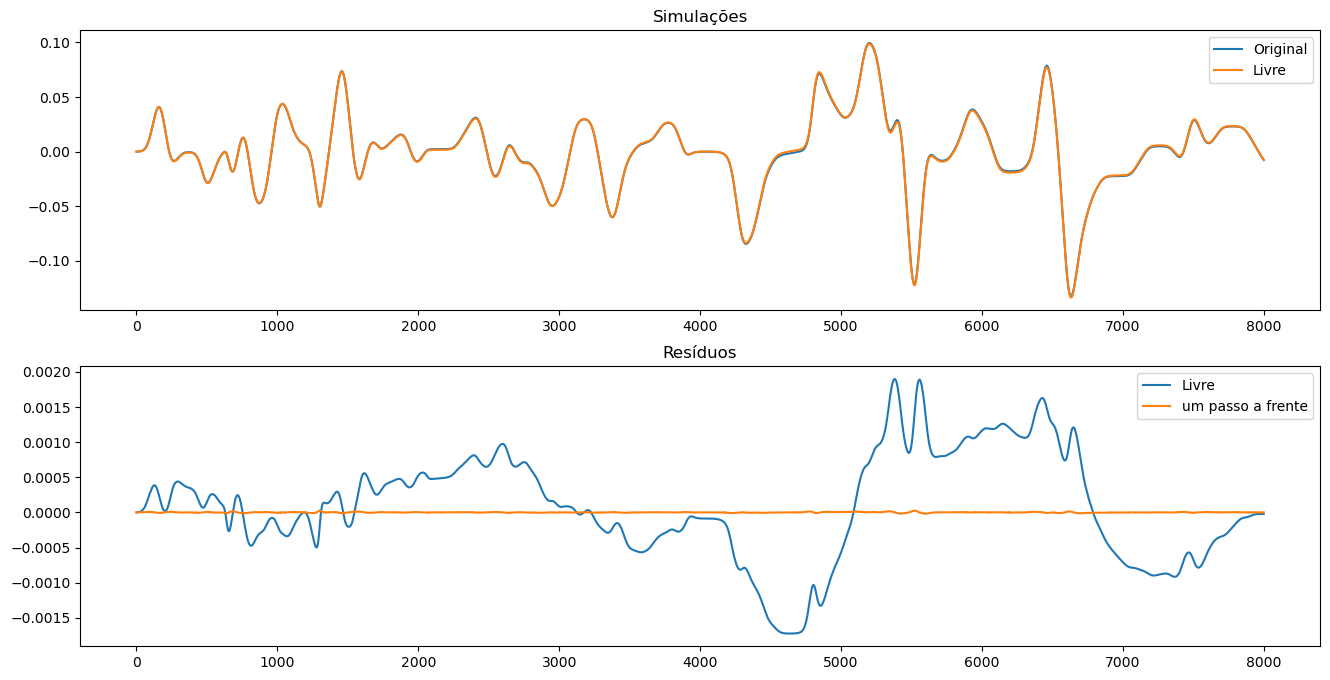

In [13]:
#uVal = UVal
valLivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], dt=0.1)

print("Modelo selecionado:")
pprint( model @ theta)

f, ax = plt.subplots(2,1, figsize=[16, 8])

ax[0].plot(yVal[output].T, label='Original')
ax[0].plot(valLivre, label='Livre')
#ax[0].plot(yhat, label='um passo a frente')
ax[0].set_title("Simulações")
ax[0].legend()


ax[1].plot(yVal[output].T - valLivre, label='Livre')
ax[1].plot(yVal[output].T - yhat, label='um passo a frente')
ax[1].set_title("Resíduos")
ax[1].legend()
plt.show()

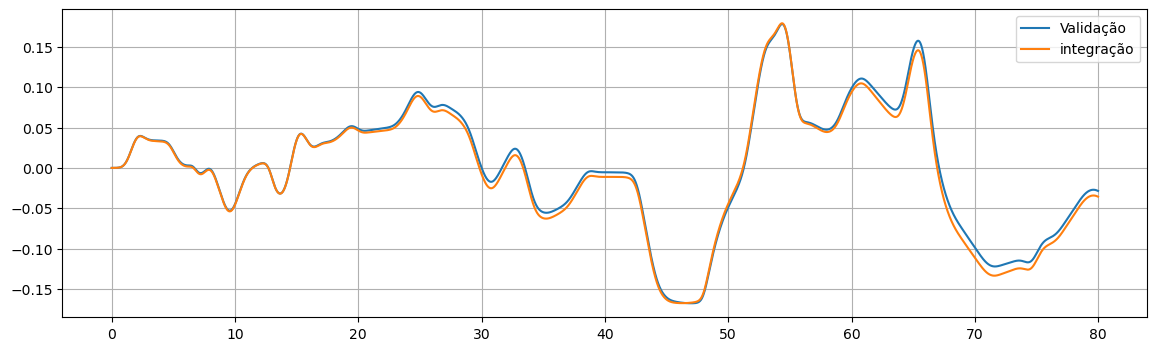

In [14]:
plt.figure(figsize=(14, 4))
plt.plot(tVal, yValidation.T, label="Validação")
plt.plot(tVal, integrate(valLivre, ts=dt), label="integração")
plt.legend()
plt.grid()
plt.show()